In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,NaN,0.0,33.6,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,NaN,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,NaN,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,NaN,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	57
float64		column 3	95
float64		column 4	57
float64		column 5	76
float64		column 6	76
float64		column 7	76
float64		column 8	114


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,711.000000,711.000000,673.000000,711.000000,692.000000,692.000000,692.000000,654.000000
mean,3.783404,120.378340,69.533432,20.908579,74.952312,32.012283,0.469277,32.648318
std,3.282614,31.109829,18.678176,15.639561,106.686982,7.533246,0.327916,11.008497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.600000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,20.000000,32.050000,0.377000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,122.000000,36.300000,0.607750,39.000000
max,17.000000,197.000000,122.000000,99.000000,744.000000,67.100000,2.420000,70.000000


<AxesSubplot:>

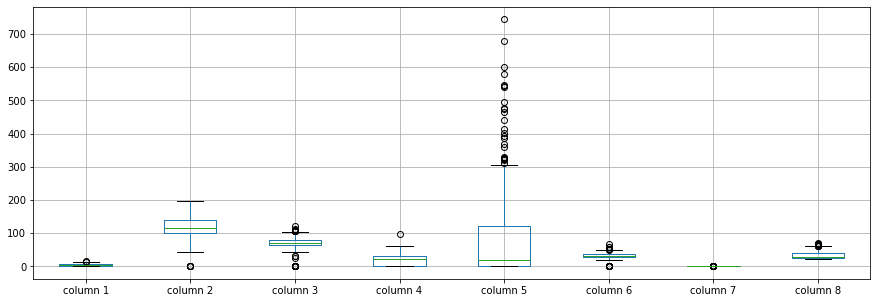

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.783404
column 2    120.378340
column 3     69.533432
column 4     20.908579
column 5     74.952312
column 6     32.012283
column 7      0.469277
column 8     32.648318
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.119209,0.146477,-0.088541,-0.088852,0.002413,-0.055525,0.517439
column 2,0.119209,1.000000,0.141251,0.045272,0.263284,0.226230,0.130750,0.270763
column 3,0.146477,0.141251,1.000000,0.213572,0.088427,0.256196,0.045351,0.266822
column 4,-0.088541,0.045272,0.213572,1.000000,0.434574,0.368639,0.184379,-0.127343
column 5,-0.088852,0.263284,0.088427,0.434574,1.000000,0.199103,0.192307,-0.069261
column 6,0.002413,0.226230,0.256196,0.368639,0.199103,1.000000,0.134320,0.059493
column 7,-0.055525,0.130750,0.045351,0.184379,0.192307,0.134320,1.000000,0.038383
column 8,0.517439,0.270763,0.266822,-0.127343,-0.069261,0.059493,0.038383,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+24,8+24+24,8+24+24+24,8+24+24+24+24,8+24+24+24+24+24,8+24+24+24+24+24+24,8+24+24+24+24+24,8+24+24+24+24,8+24+24+24,8+24+24,8+24,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 378.5656967163086
Epoch: 1 , loss: 377.1389643351237
Epoch: 2 , loss: 376.29964447021484
Epoch: 3 , loss: 375.8771680196126
Epoch: 4 , loss: 374.1464195251465
Epoch: 5 , loss: 373.1310393015544
Epoch: 6 , loss: 370.1178461710612
Epoch: 7 , loss: 368.6947701772054
Epoch: 8 , loss: 367.6974557240804
Epoch: 9 , loss: 363.88182894388837
Epoch: 10 , loss: 359.41578992207843
Epoch: 11 , loss: 349.4536590576172
Epoch: 12 , loss: 347.5960756937663
Epoch: 13 , loss: 345.29332478841144
Epoch: 14 , loss: 337.9470262527466
Epoch: 15 , loss: 331.3559281031291
Epoch: 16 , loss: 327.53260135650635
Epoch: 17 , loss: 326.87136522928876
Epoch: 18 , loss: 320.4872868855794
Epoch: 19 , loss: 313.2644742329915
Epoch: 20 , loss: 309.3898814519246
Epoch: 21 , loss: 307.7287375132243
Epoch: 22 , loss: 306.5166263580322
Epoch: 23 , loss: 298.82030359903973
Epoch: 24 , loss: 300.75022951761883
Epoch: 25 , loss: 301.3386297225952

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.00000,0.000000,-16.038019,0.0,0.0,-0.241488,-21.176531
1,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,-107.26004,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.00000,4.056446,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
763,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,-62.526020
764,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
765,0.0,0.00000,-45.475769,0.000000,0.0,0.0,0.000000,0.000000
766,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1911.274407273282, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.3308662995069414

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5     10.609612
column 6      6.638185
column 7      0.855000
column 8      6.453145
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.00000,72.000000,18.961981,0.0,33.6,0.385512,28.823469
1,1.0,85.00000,66.000000,29.000000,0.0,26.6,0.351000,31.000000
2,8.0,75.73996,64.000000,0.000000,0.0,23.3,0.672000,32.000000
3,1.0,89.00000,66.000000,23.000000,94.0,28.1,0.167000,21.000000
4,0.0,137.00000,44.056446,35.000000,168.0,43.1,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.0,101.00000,76.000000,48.000000,180.0,32.9,0.171000,0.473980
764,2.0,122.00000,70.000000,27.000000,0.0,36.8,0.340000,27.000000
765,5.0,121.00000,26.524231,23.000000,112.0,26.2,0.245000,30.000000
766,1.0,126.00000,60.000000,0.000000,0.0,30.1,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_NN_10.xlsx", index=False, header=False)